In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *




In [33]:
# import dataset
df = pd.read_csv(r'C:\Users\User\Downloads\Hospital_Inpatient_Discharges__SPARCS_De-Identified___2022_20250319.csv')


# clean dataset
# filter rows to keep pneumonia only
df_pneumonia = df[df['CCSR Diagnosis Description'].str.contains('Pneumonia', case=False, na=False)].copy()

# chosen variables
df_pneumonia = df_pneumonia[[
    'Length of Stay', 
    'APR Severity of Illness Code',
    'APR Severity of Illness Description',
    'APR Risk of Mortality',
    'Age Group',
    'Type of Admission',
    'Patient Disposition',
    'Emergency Department Indicator',
    'Gender',
    'Race',
    'Ethnicity',
    'Hospital County',
    'Facility Name',
    'Payment Typology 1',
    'Total Charges',
    'Total Costs'
]]




numeric_cols = ['Length of Stay', 'Total Charges', 'Total Costs']

# use regex in order to convert
for col in numeric_cols:
    df_pneumonia[col] = df_pneumonia[col].replace('[\$,]', '', regex=True).str.strip()

# convert to numeric
for col in numeric_cols:
    df_pneumonia[col] = pd.to_numeric(df_pneumonia[col], errors='coerce')


df_pneumonia.dropna(subset=numeric_cols, inplace=True)


for col in numeric_cols:
    df_pneumonia[col] = df_pneumonia[col].astype(int)


display(df_pneumonia.head())
display(df_pneumonia.info())
display(df_pneumonia.describe())




<>:36: SyntaxWarning: invalid escape sequence '\$'
<>:36: SyntaxWarning: invalid escape sequence '\$'
C:\Users\User\AppData\Local\Temp\ipykernel_22996\1088721499.py:36: SyntaxWarning: invalid escape sequence '\$'
  df_pneumonia[col] = df_pneumonia[col].replace('[\$,]', '', regex=True).str.strip()
C:\Users\User\AppData\Local\Temp\ipykernel_22996\1088721499.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\User\Downloads\Hospital_Inpatient_Discharges__SPARCS_De-Identified___2022_20250319.csv')


,Length of Stay,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,Age Group,Type of Admission,Patient Disposition,Emergency Department Indicator,Gender,Race,Ethnicity,Hospital County,Facility Name,Payment Typology 1,Total Charges,Total Costs
127,1,1,Minor,Minor,70 or Older,Emergency,Home or Self Care,Y,F,Other Race,Spanish/Hispanic,Bronx,Montefiore Medical Center - Henry & Lucy Moses...,Medicare,25253,3707
195,6,3,Major,Major,50 to 69,Emergency,Home or Self Care,Y,F,Black/African American,Not Span/Hispanic,Bronx,Montefiore Med Center - Jack D Weiler Hosp of ...,Private Health Insurance,79926,13136
324,10,3,Major,Moderate,70 or Older,Emergency,Hospice - Medical Facility,Y,F,White,Not Span/Hispanic,Rockland,Montefiore Nyack,Medicare,72790,19727
399,1,3,Major,Extreme,50 to 69,Emergency,Home or Self Care,Y,F,Black/African American,Not Span/Hispanic,Manhattan,New York Presbyterian Hospital - Allen Hospital,Blue Cross/Blue Shield,18551,4049
408,6,3,Major,Extreme,50 to 69,Emergency,Skilled Nursing Home,Y,F,Multi-racial,Unknown,Manhattan,New York Presbyterian Hospital - Allen Hospital,Medicare,92468,20050


<class 'pandas.core.frame.DataFrame'>
Index: 28030 entries, 127 to 2103418
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Length of Stay                       28030 non-null  int64 
 1   APR Severity of Illness Code         28030 non-null  int64 
 2   APR Severity of Illness Description  28030 non-null  object
 3   APR Risk of Mortality                28030 non-null  object
 4   Age Group                            28030 non-null  object
 5   Type of Admission                    28030 non-null  object
 6   Patient Disposition                  28030 non-null  object
 7   Emergency Department Indicator       28030 non-null  object
 8   Gender                               28030 non-null  object
 9   Race                                 28030 non-null  object
 10  Ethnicity                            28030 non-null  object
 11  Hospital County                      27979

None

,Length of Stay,APR Severity of Illness Code,Total Charges,Total Costs
count,28030.000000,28030.000000,2.803000e+04,28030.000000
mean,5.512629,2.696468,5.898743e+04,18245.763004
std,6.015437,0.894833,9.399372e+04,29209.080441
min,1.000000,1.000000,1.119000e+03,481.000000
25%,2.000000,2.000000,1.862225e+04,6083.250000
50%,4.000000,3.000000,3.467250e+04,10675.000000
75%,7.000000,3.000000,6.735275e+04,20146.750000
max,117.000000,4.000000,3.758729e+06,916056.000000


In [34]:
#check for NA

print(f"Rows with invalid LOS values: {df_pneumonia.isna().sum()}")

Rows with invalid LOS values: Length of Stay                          0
APR Severity of Illness Code            0
APR Severity of Illness Description     0
APR Risk of Mortality                   0
Age Group                               0
Type of Admission                       0
Patient Disposition                     0
Emergency Department Indicator          0
Gender                                  0
Race                                    0
Ethnicity                               0
Hospital County                        51
Facility Name                           0
Payment Typology 1                      0
Total Charges                           0
Total Costs                             0
dtype: int64


Exploratory Data Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_22996\1621287041.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LOS Bucket', data=df_pneumonia, order=labels, palette='Blues_d')


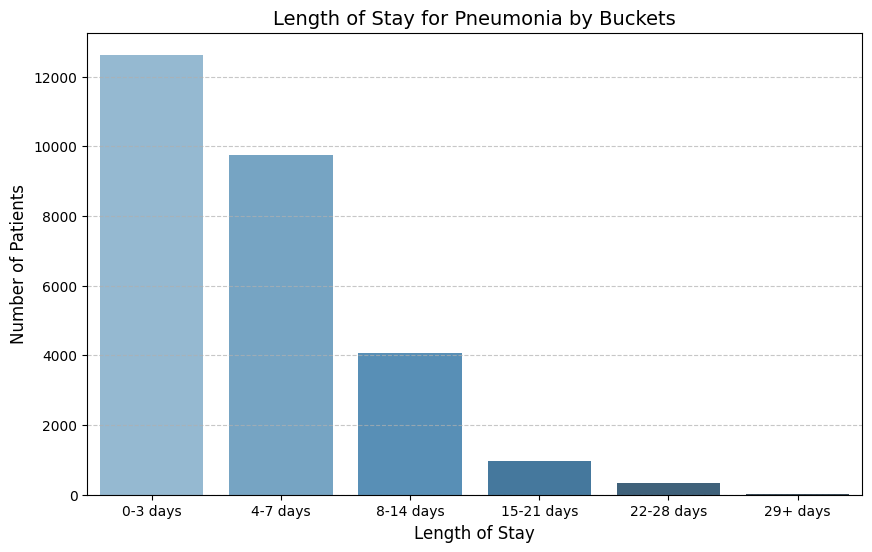

In [35]:
# Length of stay distribution

# define bins
bins = [0, 3, 7, 14, 21, 28, 29]
labels = ['0-3 days', '4-7 days', '8-14 days', '15-21 days', '22-28 days', '29+ days']


df_pneumonia['LOS Bucket'] = pd.cut(df_pneumonia['Length of Stay'], bins=bins, labels=labels, include_lowest=True)

# bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='LOS Bucket', data=df_pneumonia, order=labels, palette='Blues_d')


plt.title('Length of Stay for Pneumonia by Buckets', fontsize=14)
plt.xlabel('Length of Stay', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_22996\1705992150.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


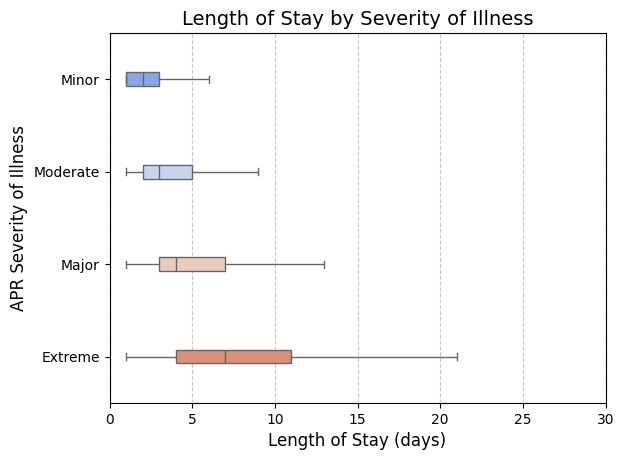

In [36]:


sns.boxplot(
    y='APR Severity of Illness Description',
    x='Length of Stay',
    data=df_pneumonia,
    order=['Minor', 'Moderate', 'Major', 'Extreme'],
    width=0.15,
    palette='coolwarm',
    boxprops={'zorder': 2},
    showfliers=False  # removes outliers from the boxplot itself
)

# Zooming into central LOS distribution (0–30 days typically)
plt.xlim(0, 30)

plt.title('Length of Stay by Severity of Illness', fontsize=14)
plt.xlabel('Length of Stay (days)', fontsize=12)
plt.ylabel('APR Severity of Illness', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_22996\1905933196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


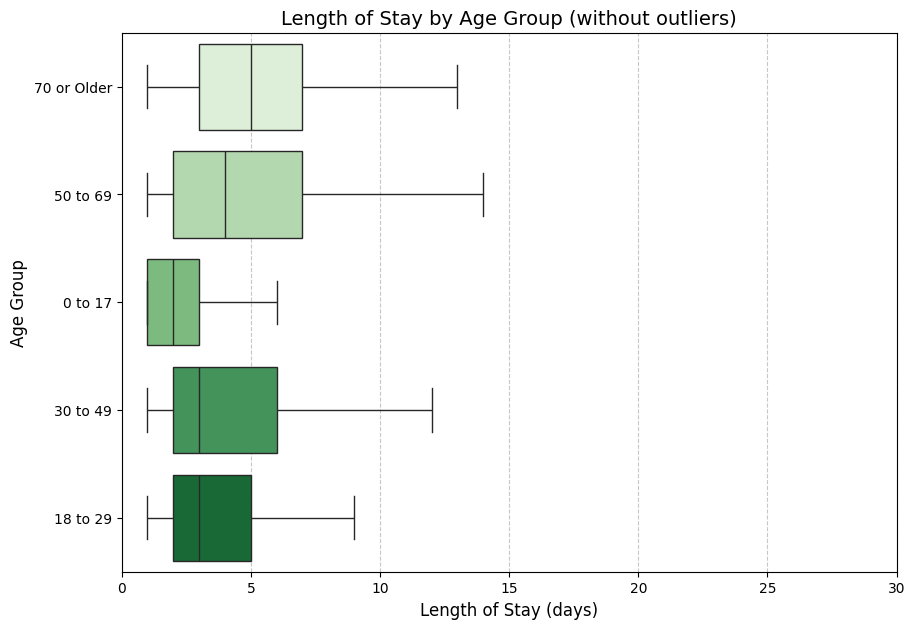

In [ ]:
plt.figure(figsize=(10, 7))

sns.boxplot(
    y='Age Group',
    x='Length of Stay',
    data=df_pneumonia,
    showfliers=False,  # removes outliers
    palette='Greens'
)


plt.xlim(0, 30)


plt.title('Length of Stay by Age Group (without outliers)', fontsize=14)
plt.xlabel('Length of Stay (days)', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_22996\2751531313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


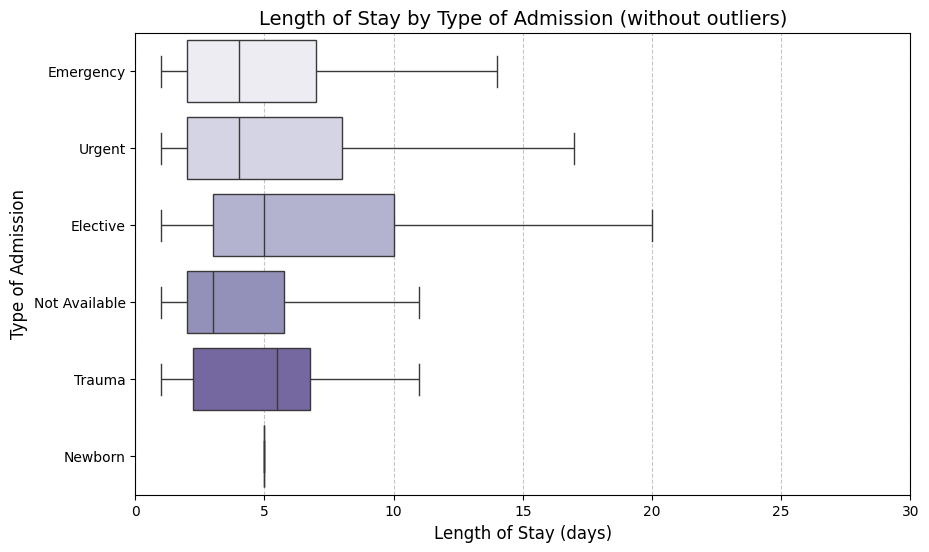

In [38]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    y='Type of Admission',
    x='Length of Stay',
    data=df_pneumonia,
    showfliers=False,
    palette='Purples'
)

# Limit x-axis to a practical range (0–30 days)
plt.xlim(0, 30)

# Enhance readability clearly
plt.title('Length of Stay by Type of Admission (without outliers)', fontsize=14)
plt.xlabel('Length of Stay (days)', fontsize=12)
plt.ylabel('Type of Admission', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()




C:\Users\User\AppData\Local\Temp\ipykernel_22996\2196549746.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


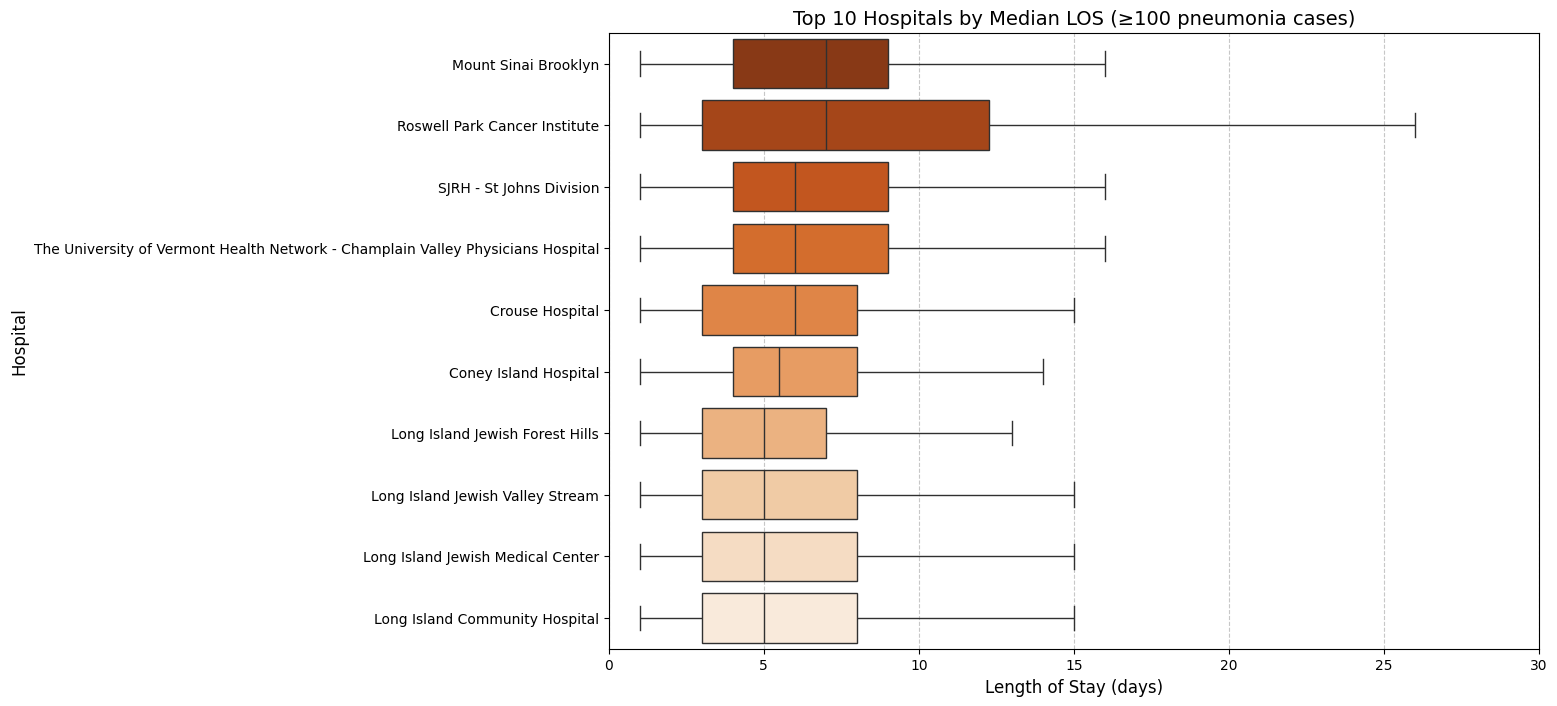

,Length of Stay,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,Age Group,Type of Admission,Patient Disposition,Emergency Department Indicator,Gender,Race,Ethnicity,Hospital County,Facility Name,Payment Typology 1,Total Charges,Total Costs,LOS Bucket
127,1,1,Minor,Minor,70 or Older,Emergency,Home or Self Care,Y,F,Other Race,Spanish/Hispanic,Bronx,Montefiore Medical Center - Henry & Lucy Moses...,Medicare,25253,3707,0-3 days
195,6,3,Major,Major,50 to 69,Emergency,Home or Self Care,Y,F,Black/African American,Not Span/Hispanic,Bronx,Montefiore Med Center - Jack D Weiler Hosp of ...,Private Health Insurance,79926,13136,4-7 days
324,10,3,Major,Moderate,70 or Older,Emergency,Hospice - Medical Facility,Y,F,White,Not Span/Hispanic,Rockland,Montefiore Nyack,Medicare,72790,19727,8-14 days
399,1,3,Major,Extreme,50 to 69,Emergency,Home or Self Care,Y,F,Black/African American,Not Span/Hispanic,Manhattan,New York Presbyterian Hospital - Allen Hospital,Blue Cross/Blue Shield,18551,4049,0-3 days
408,6,3,Major,Extreme,50 to 69,Emergency,Skilled Nursing Home,Y,F,Multi-racial,Unknown,Manhattan,New York Presbyterian Hospital - Allen Hospital,Medicare,92468,20050,4-7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103060,1,3,Major,Minor,0 to 17,Emergency,Home or Self Care,Y,M,White,Not Span/Hispanic,Monroe,Strong Memorial Hospital,Medicaid,5701,2177,0-3 days
2103173,2,2,Moderate,Minor,0 to 17,Emergency,Home or Self Care,Y,F,Black/African American,Unknown,Bronx,Lincoln Medical & Mental Health Center,Medicaid,19863,12695,0-3 days
2103187,4,4,Extreme,Extreme,50 to 69,Emergency,Home w/ Home Health Services,Y,M,Black/African American,Not Span/Hispanic,Bronx,Jacobi Medical Center,Medicare,47244,28041,4-7 days
2103246,8,2,Moderate,Major,30 to 49,Emergency,Home or Self Care,Y,F,Other Race,Spanish/Hispanic,Manhattan,Bellevue Hospital Center,Medicaid,85808,49347,8-14 days


In [ ]:
# identify hospitals with 100 cases
hospital_counts = df_pneumonia['Facility Name'].value_counts()
hospitals_over_100 = hospital_counts[hospital_counts > 100].index

# calculate median for those hospitals
median_los = (df_pneumonia[df_pneumonia['Facility Name'].isin(hospitals_over_100)]
              .groupby('Facility Name')['Length of Stay']
              .median()
              .sort_values(ascending=False)
              .head(10))

top10_hospitals = median_los.index

# filter
df_top10 = df_pneumonia[df_pneumonia['Facility Name'].isin(top10_hospitals)]

# plot
plt.figure(figsize=(12, 8))
sns.boxplot(y='Facility Name',x='Length of Stay', data=df_top10, order=top10_hospitals, showfliers=False, palette='Oranges_r')


plt.xlim(0, 30)
plt.title('Top 10 Hospitals by Median LOS (≥100 pneumonia cases)', fontsize=14)
plt.xlabel('Length of Stay (days)', fontsize=12)
plt.ylabel('Hospital', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

display(df_pneumonia)


In [ ]:
# copy
df_pneumonia_encoded = df_pneumonia.copy()

# threshold for "extended stay" >7
threshold = 7
df_pneumonia_encoded['ExtendedStay'] = np.where(df_pneumonia_encoded['Length of Stay'] > threshold, 1, 0)


severity_map = {'Minor': 1, 'Moderate': 2, 'Major': 3, 'Extreme': 4}
mortality_map = {'Minor': 1, 'Moderate': 2, 'Major': 3, 'Extreme': 4}
age_group_map = {
    '0-17': 1,
    '18 to 29': 2,       
    '30 to 49': 3,
    '50 to 69': 4,
    '70 or Older': 5
}

# encode
df_pneumonia_encoded['APR Risk of Mortality Ord'] = df_pneumonia_encoded['APR Risk of Mortality'].map(mortality_map)
df_pneumonia_encoded['Age Group Ord'] = df_pneumonia_encoded['Age Group'].map(age_group_map)


nominal_cols = [
    'Type of Admission',
    'Patient Disposition',
    'Emergency Department Indicator',
    'Gender',
    'Race',
    'Ethnicity',
    'Payment Typology 1',
    
]

df_pneumonia_encoded = pd.get_dummies(df_pneumonia_encoded, columns=nominal_cols, drop_first=True)


df_pneumonia_encoded.drop(columns=[
    'APR Severity of Illness Description',
    'APR Risk of Mortality',
    'Age Group'
], inplace=True)

df_pneumonia_encoded.drop(columns=['LOS Bucket'], inplace=True)
df_pneumonia_encoded.drop(columns=['Facility Name'], inplace=True)
df_pneumonia_encoded.drop(columns=["Hospital County"], inplace=True)

display(df_pneumonia_encoded)




,Length of Stay,APR Severity of Illness Code,Total Charges,Total Costs,ExtendedStay,APR Risk of Mortality Ord,Age Group Ord,Type of Admission_Emergency,Type of Admission_Newborn,Type of Admission_Not Available,...,Ethnicity_Spanish/Hispanic,Ethnicity_Unknown,Payment Typology 1_Department of Corrections,Payment Typology 1_Federal/State/Local/VA,"Payment Typology 1_Managed Care, Unspecified",Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay
127,1,1,25253,3707,0,1,5.0,True,False,False,...,True,False,False,False,False,False,True,False,False,False
195,6,3,79926,13136,0,3,4.0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
324,10,3,72790,19727,1,2,5.0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
399,1,3,18551,4049,0,4,4.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
408,6,3,92468,20050,0,4,4.0,True,False,False,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103060,1,3,5701,2177,0,1,NaN,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2103173,2,2,19863,12695,0,1,NaN,True,False,False,...,False,True,False,False,False,True,False,False,False,False
2103187,4,4,47244,28041,0,4,4.0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2103246,8,2,85808,49347,1,3,3.0,True,False,False,...,True,False,False,False,False,True,False,False,False,False


In [41]:
# Question 1 

# Which patient factors (e.g., age, comorbidities like COPD) are most predictive of an extended LOS?



In [42]:

df_pneumonia_encoded.dropna(inplace=True)

X = df_pneumonia_encoded.drop(columns=['ExtendedStay', 'Length of Stay'])
y = df_pneumonia_encoded['ExtendedStay']

# train and test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)




c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [43]:
coefs = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
})
coefs.sort_values(by='Coefficient', ascending=False, inplace=True)
coefs.head(15)  # top 15


,Feature,Coefficient
27,Patient Disposition_Skilled Nursing Home,0.448968
33,Race_White,0.444986
38,Payment Typology 1_Federal/State/Local/VA,0.400372
19,Patient Disposition_Hospice - Home,0.298627
0,APR Severity of Illness Code,0.250890
20,Patient Disposition_Hospice - Medical Facility,0.166225
21,Patient Disposition_Inpatient Rehabilitation F...,0.095728
10,Patient Disposition_Cancer Center or Children'...,0.082625
24,Patient Disposition_Medicare Cert Long Term Ca...,0.062668
11,Patient Disposition_Court/Law Enforcement,0.055067


In [44]:
#Question 2: Can we build a predictive model to determine if someone is at risk for a prolonged stay? (>7 days)


df_pneumonia_encoded1 = df_pneumonia.copy()

df_pneumonia_encoded1['HighRisk'] = np.where(df_pneumonia['Length of Stay'] > 7, 1, 0)


# Ordinal maps
severity_map = {'Minor': 1, 'Moderate': 2, 'Major': 3, 'Extreme': 4}
mortality_map = {'Minor': 1, 'Moderate': 2, 'Major': 3, 'Extreme': 4}
age_group_map = {
    '0-17': 1,
    '18 to 29': 2,       
    '30 to 49': 3,
    '50 to 69': 4,
    '70 or Older': 5
}

#encode ordinal
df_pneumonia_encoded1['APR Risk of Mortality Ord'] = df_pneumonia_encoded1['APR Risk of Mortality'].map(mortality_map)
df_pneumonia_encoded1['Age Group Ord'] = df_pneumonia_encoded1['Age Group'].map(age_group_map)

# encode nominal
nominal_cols = [
    'Type of Admission',
    'Patient Disposition',
    'Emergency Department Indicator',
    'Gender',
    'Race',
    'Ethnicity',
    'Payment Typology 1',
    'Facility Name',
    'Hospital County'
]

df_pneumonia_encoded1 = pd.get_dummies(df_pneumonia_encoded1, columns=nominal_cols, drop_first=True)


df_pneumonia_encoded1.drop(columns=[
    'APR Severity of Illness Description',
    'APR Risk of Mortality',
    'Age Group'
], inplace=True)

df_pneumonia_encoded1.drop(columns=['LOS Bucket'], inplace=True)

display(df_pneumonia_encoded1)

median_age_num = df_pneumonia_encoded1['Age Group Ord'].median()  

# fill nan values in "Age Group Ord" with median
df_pneumonia_encoded1['Age Group Ord'].fillna(median_age_num, inplace=True)



,Length of Stay,APR Severity of Illness Code,Total Charges,Total Costs,HighRisk,APR Risk of Mortality Ord,Age Group Ord,Type of Admission_Emergency,Type of Admission_Newborn,Type of Admission_Not Available,...,Hospital County_Steuben,Hospital County_Suffolk,Hospital County_Sullivan,Hospital County_Tompkins,Hospital County_Ulster,Hospital County_Warren,Hospital County_Wayne,Hospital County_Westchester,Hospital County_Wyoming,Hospital County_Yates
127,1,1,25253,3707,0,1,5.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
195,6,3,79926,13136,0,3,4.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
324,10,3,72790,19727,1,2,5.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
399,1,3,18551,4049,0,4,4.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
408,6,3,92468,20050,0,4,4.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103060,1,3,5701,2177,0,1,NaN,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2103173,2,2,19863,12695,0,1,NaN,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2103187,4,4,47244,28041,0,4,4.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2103246,8,2,85808,49347,1,3,3.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


C:\Users\User\AppData\Local\Temp\ipykernel_22996\1532365294.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pneumonia_encoded1['Age Group Ord'].fillna(median_age_num, inplace=True)


In [ ]:
# random forest classifier

X = df_pneumonia_encoded1.drop(columns=['HighRisk', 'Length of Stay'])  
y = df_pneumonia_encoded1['HighRisk']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)


rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])  

# model performance

print(f"Accuracy:  {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall:    {rec:.2f}")
print(f"F1 Score:  {f1:.2f}")
print(f"ROC-AUC:   {auc:.2f}")



Accuracy:  0.93
Precision: 0.85
Recall:    0.75
F1 Score:  0.80
ROC-AUC:   0.97


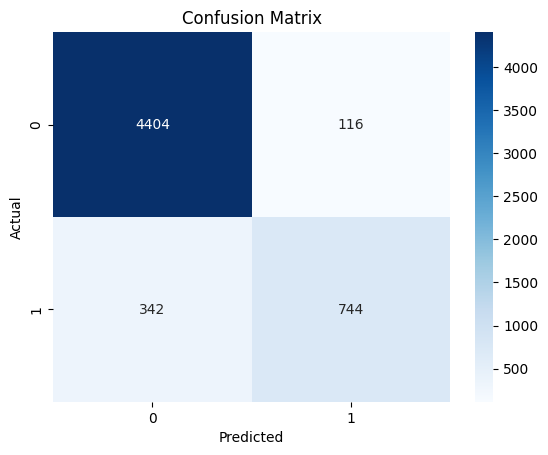

In [56]:

# confusion matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [50]:
# logistic regression classifier


from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(max_iter=1000, random_state=42)
log_clf.fit(X_train, y_train)

y_pred = log_clf.predict(X_test)




c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])  

print(f"Accuracy:  {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall:    {rec:.2f}")
print(f"F1 Score:  {f1:.2f}")

Accuracy:  0.92
Precision: 0.87
Recall:    0.69
F1 Score:  0.76
